# Arbre de décision et Forêt aléatoire
## Partie 1 – Chargement & Exploration
1. Chargez le jeu de données Titanic. A chez les 5 premières lignes et les types de données. Que
remarquez-vous ?

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("titanic/train.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Combien y a-t-il de passagers au total ? Combien de survivants ? Calculez les proportions.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape[0]

891

In [6]:
# Survivant
survivant = df[df['Survived'] == 1]
mort = df[df['Survived'] == 0]
print("Survivant: ", survivant.shape[0], "Pourcentage: ", (survivant.shape[0] / df.shape[0]) * 100)

Survivant:  342 Pourcentage:  38.38383838383838


3. Identiez les colonnes avec des valeurs manquantes. Pour chaque colonne concernée, indiquez le
nombre et le pourcentage de valeurs manquantes.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Partie 2 – Nettoyage & Préparation
4. Imputez les valeurs manquantes : Age par la médiane, Embarked par la modalité la plus fréquente.

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


6. Créez une nouvelle variable Title à partir de Name. Est-ce une variable informative ? Visualisez sa distribution.

In [11]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


5. Supprimez les colonnes inutiles : PassengerId, Name, Ticket, Cabin. Justiez ce choix.

In [13]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns_to_drop, axis=1)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,28.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [15]:
df['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [16]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

## Partie 3 – Encodage & Prétraitement
7. Encodez les variables catégorielles (Sex, Embarked, Title) à l’aide de LabelEncoder ou
OneHotEncoder. Testez les deux méthodes.


In [17]:
def label_encoding(dataframe, column):
    # LabelEncoder
    from sklearn.preprocessing import LabelEncoder
    value = list(dataframe[column].unique())
    label = LabelEncoder()
    label.fit(value)
    dataframe[f"{column}_LabelEncoder"] = label.fit_transform(dataframe[column])
    return dataframe

def one_hot_encoding(dataframe, column):
    # OneHotEncoder
    from sklearn.preprocessing import OneHotEncoder
    one_hot = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    one_hot_value = one_hot.fit_transform(dataframe[column].to_frame())
    one_hot_data = pd.DataFrame(one_hot_value, columns=one_hot.get_feature_names_out([column]))
    return pd.concat([dataframe.drop(column, axis = 1), one_hot_data], axis=1)

def encode(dataframe, columns):
    new_dataframe = dataframe.copy()
    for column in columns:
        new_dataframe = label_encoding(new_dataframe, column)
        new_dataframe = one_hot_encoding(new_dataframe, column)
    return new_dataframe

In [18]:
df_encoded = encode(df, ['Title', 'Embarked', 'Sex'])

In [19]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_LabelEncoder,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_LabelEncoder,Embarked_Q,Embarked_S,Sex_LabelEncoder,Sex_male
0,0,3,22.0,1,0,7.2500,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
1,1,1,38.0,1,0,71.2833,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,1,3,26.0,0,0,7.9250,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
3,1,1,35.0,1,0,53.1000,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
4,0,3,35.0,0,0,8.0500,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,14,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,1,1.0
887,1,1,19.0,0,0,30.0000,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
888,0,3,28.0,1,2,23.4500,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
889,1,1,26.0,0,0,30.0000,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1.0


8. Standardisez Age et Fare avec StandardScaler. Pourquoi cette étape peut-elle être utile même avec des arbres ?

In [20]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
# Age
df_encoded['Age'] = standard_scaler.fit_transform(df_encoded['Age'].to_frame())
# Fare
df_encoded['Fare'] = standard_scaler.fit_transform(df_encoded['Fare'].to_frame())
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_LabelEncoder,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_LabelEncoder,Embarked_Q,Embarked_S,Sex_LabelEncoder,Sex_male
0,0,3,-0.565736,1,0,-0.502445,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
1,1,1,0.663861,1,0,0.786845,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,1,3,-0.258337,0,0,-0.488854,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
3,1,1,0.433312,1,0,0.420730,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
4,0,3,0.433312,0,0,-0.486337,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,14,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,1,1.0
887,1,1,-0.796286,0,0,-0.044381,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
888,0,3,-0.104637,1,2,-0.176263,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
889,1,1,-0.258337,0,0,-0.044381,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1.0


9. Divisez le dataset en X et y. Cible = Survived. Faites un train_test_split (70/30) avec random_state=42.

In [21]:
from sklearn.model_selection import train_test_split
y = df_encoded['Survived']
x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop(['Survived', "Sex_LabelEncoder"], axis=1), y, test_size=0.4, random_state=42)

## Partie 4 – Visualisation & Analyse Exploratoire
10. Affichez la heatmap des corrélations. Quelles sont les variables les plus corrélées avec Survived ?


In [22]:
correlation = df_encoded.corr()
correlation_y = correlation["Survived"].abs().sort_values()
strong_corr = correlation_y[(correlation_y > 0.3) & (correlation_y < 0.98)]
strong_corr = df_encoded[strong_corr.index].corr()
features = [column for column in list(strong_corr.index) if column != "Sex_LabelEncoder"]
df_encoded[features].corr()

,Title_Miss,Pclass,Title_Mrs,Sex_male,Title_Mr
Title_Miss,1.000000,-0.000576,-0.204670,-0.686808,-0.595692
Pclass,-0.000576,1.000000,-0.149209,0.131900,0.142698
Title_Mrs,-0.204670,-0.149209,1.000000,-0.547600,-0.474952
Sex_male,-0.686808,0.131900,-0.547600,1.000000,0.867334
Title_Mr,-0.595692,0.142698,-0.474952,0.867334,1.000000


In [23]:
strong_corr.var().sort_values()

Pclass              0.162840
Title_Mrs           0.349432
Title_Miss          0.422044
Title_Mr            0.512258
Sex_male            0.604427
Sex_LabelEncoder    0.604427
dtype: float64

<Axes: >

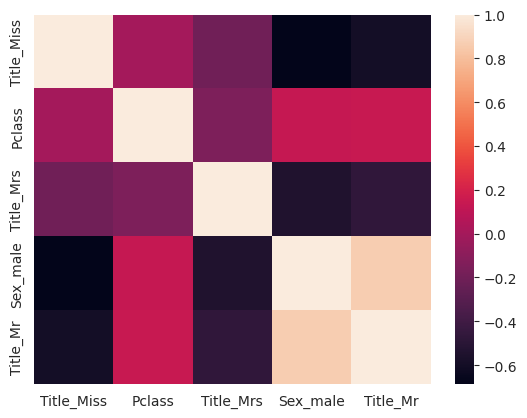

In [24]:
import seaborn as sns
sns.heatmap(df_encoded[features].corr())

11. Réalisez des barplots de survie par Sex, Pclass, Embarked, et Title. Qu’en concluez-vous ?

<Axes: xlabel='Sex'>

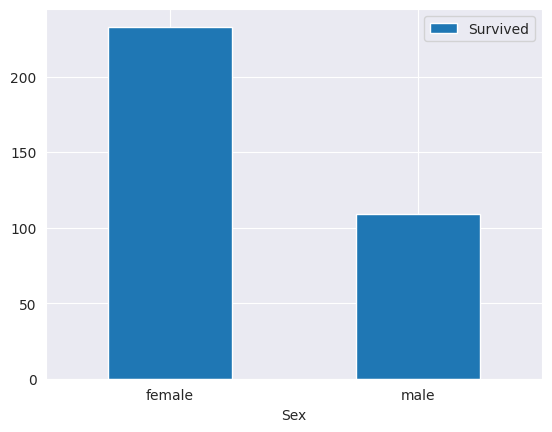

In [25]:
df.groupby('Sex').sum().plot(y='Survived', rot=0, kind="bar")

<Axes: xlabel='Pclass'>

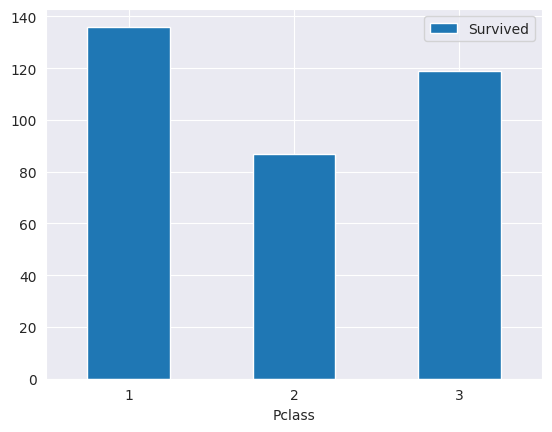

In [26]:
df.groupby('Pclass').sum().plot(y='Survived', rot=0, kind="bar")

<Axes: xlabel='Embarked'>

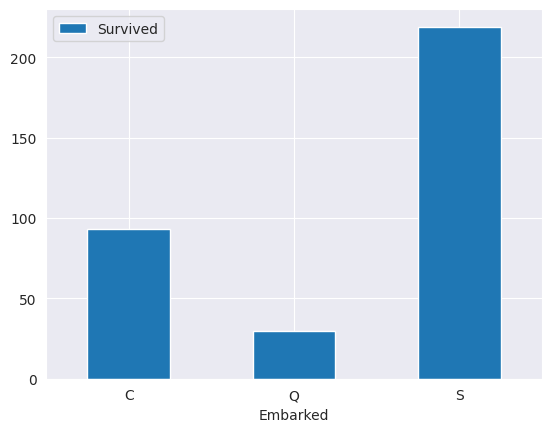

In [27]:
df.groupby('Embarked').sum().plot(y='Survived', rot=0, kind="bar")

<Axes: xlabel='Title'>

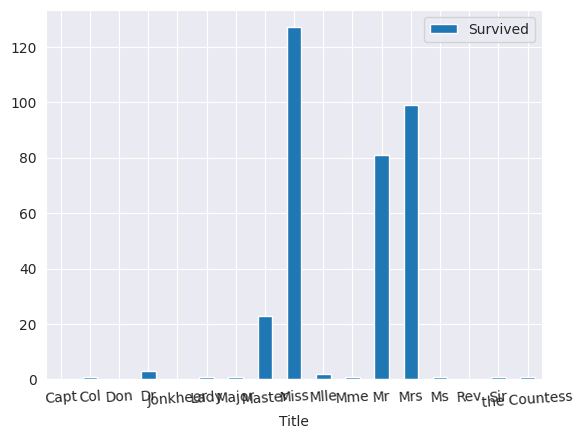

In [28]:
df.groupby('Title').sum().plot(y='Survived', rot=4, kind="bar")

## Partie 5 – Arbre de Décision
12. Entraînez un DecisionTreeClassifier (max_depth=4). Affichez l’arbre avec plot_tree ou graphviz.


In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
decision_tree = DecisionTreeClassifier(max_depth=4)
tree_classify = decision_tree.fit(x_train, y_train)

[Text(0.5089285714285714, 0.9, 'x[25] <= 0.5\ngini = 0.469\nsamples = 534\nvalue = [333, 201]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 2.5\ngini = 0.38\nsamples = 188\nvalue = [48.0, 140.0]'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[1] <= -2.064\ngini = 0.059\nsamples = 99\nvalue = [3, 96]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.3, 'x[1] <= 1.548\ngini = 0.04\nsamples = 97\nvalue = [2, 95]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.023\nsamples = 86\nvalue = [1, 85]'),
 Text(0.25, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.42857142857142855, 0.5, 'x[4] <= -0.178\ngini = 0.5\nsamples = 89\nvalue = [45, 44]'),
 Text(0.35714285714285715, 0.3, 'x[4] <= -0.349\ngini = 0.484\nsamples = 73\nvalue = [30, 4

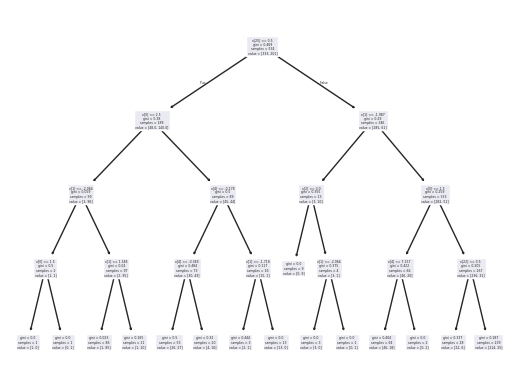

In [30]:
# Affichage avec plot_tree
plot_tree(tree_classify)

In [31]:
dot_data = export_graphviz(tree_classify, feature_names= x_train.columns, out_file="tree.dot", filled=True)

13. Évaluez le modèle avec :
+ Accuracy
+ Précision
+ Rappel
+ F1-score
+ Matrice de confusion
+ Courbe ROC


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, confusion_matrix
# Accuracy
accuracy_score(tree_classify.predict(x_test), y_test)

0.7983193277310925

In [33]:
# Précision score
precision_score(tree_classify.predict(x_test), y_test)

0.6666666666666666

In [34]:
# Rappel
recall_score(tree_classify.predict(x_test), y_test)

0.7899159663865546

In [35]:
# F1 score
f1_score(tree_classify.predict(x_test), y_test)

0.7230769230769231

In [36]:
# Matrix de confusion
confusion_matrix(tree_classify.predict(x_test), y_test)

array([[191,  47],
       [ 25,  94]])

## Partie 6 – Random Forest
14. Entraînez une RandomForestClassifier avec 100 arbres. Même split que précédemment.


In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
forest_classify = random_forest.fit(x_train, y_train)


15. Comparez les performances de la Random Forest avec l’arbre de décision sur toutes les métriques.


In [38]:
# Accuracy
accuracy_score(forest_classify.predict(x_test), y_test)

0.7843137254901961

In [39]:
# Précision score
precision_score(forest_classify.predict(x_test), y_test)

0.7021276595744681

In [40]:
# Rappel
recall_score(forest_classify.predict(x_test), y_test)

0.7388059701492538

In [41]:
# F1 score
f1_score(forest_classify.predict(x_test), y_test)

0.72

In [42]:
# Matrix de confusion
confusion_matrix(forest_classify.predict(x_test), y_test)

array([[181,  42],
       [ 35,  99]])

16. Affichez feature_importances_. Quelles sont les 3 variables les plus importantes ?


In [43]:
pd.Series(forest_classify.feature_importances_, index=x_train.columns).sort_values(ascending=False)

Fare                     0.225952
Age                      0.210647
Sex_male                 0.134154
Title_Mr                 0.078452
Pclass                   0.070315
Title_LabelEncoder       0.061210
SibSp                    0.056674
Parch                    0.039078
Title_Mrs                0.036383
Title_Miss               0.028679
Embarked_LabelEncoder    0.020588
Embarked_S               0.013831
Embarked_Q               0.008042
Title_Master             0.007067
Title_Rev                0.003833
Title_Dr                 0.002635
Title_Col                0.001316
Title_Ms                 0.000429
Title_Mlle               0.000356
Title_Lady               0.000169
Title_the Countess       0.000136
Title_Mme                0.000057
Title_Jonkheer           0.000000
Title_Don                0.000000
Title_Major              0.000000
Title_Sir                0.000000
dtype: float64

## Partie 7 – Analyse & Optimisation
17. Faites varier max_depth entre 1 et 10 pour l’arbre. Tracez l’évolution de l’accuracy en train/test.

In [48]:
x_acc = []
y_acc = []
for i in range (1, 11):
    x_acc.append(i)
    print(f"For max_depth {i}")
    decision_tree_2 = DecisionTreeClassifier(max_depth=i)
    tree_classify_2 = decision_tree_2.fit(x_train, y_train)
    # Accuracy
    acc = accuracy_score(tree_classify_2.predict(x_test), y_test)
    print("Accuracy", acc)
    y_acc.append(acc)
    # Précision score
    print("Précision score", precision_score(tree_classify_2.predict(x_test), y_test))
    # Rappel
    print("Rappel", recall_score(tree_classify_2.predict(x_test), y_test))
    # F1 score
    print("F1 score", f1_score(tree_classify_2.predict(x_test), y_test))
    # Matrix de confusion
    print("Matrix de confusion", confusion_matrix(tree_classify_2.predict(x_test), y_test))
    print("=======================================================================")

For max_depth 1
Accuracy 0.773109243697479
Précision score 0.6595744680851063
Rappel 0.7380952380952381
F1 score 0.6966292134831461
Matrix de confusion [[183  48]
 [ 33  93]]
For max_depth 2
Accuracy 0.773109243697479
Précision score 0.48226950354609927
Rappel 0.8947368421052632
F1 score 0.6267281105990783
Matrix de confusion [[208  73]
 [  8  68]]
For max_depth 3
Accuracy 0.7983193277310925
Précision score 0.6666666666666666
Rappel 0.7899159663865546
F1 score 0.7230769230769231
Matrix de confusion [[191  47]
 [ 25  94]]
For max_depth 4
Accuracy 0.7983193277310925
Précision score 0.6666666666666666
Rappel 0.7899159663865546
F1 score 0.7230769230769231
Matrix de confusion [[191  47]
 [ 25  94]]
For max_depth 5
Accuracy 0.7450980392156863
Précision score 0.5390070921985816
Rappel 0.7450980392156863
F1 score 0.6255144032921811
Matrix de confusion [[190  65]
 [ 26  76]]
For max_depth 6
Accuracy 0.7450980392156863
Précision score 0.574468085106383
Rappel 0.7232142857142857
F1 score 0.640316

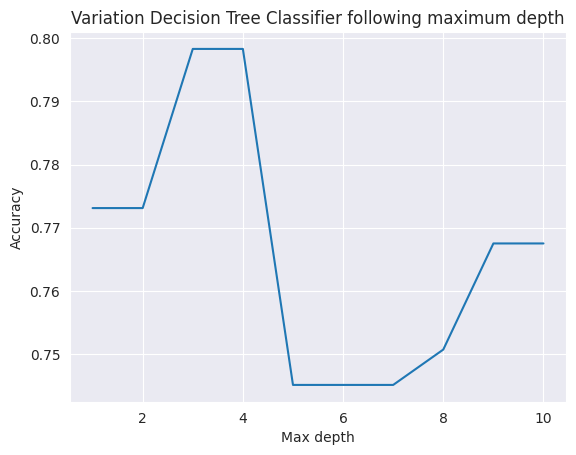

In [49]:
import matplotlib.pyplot as plt
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Variation Decision Tree Classifier following maximum depth")
plt.plot(x_acc, y_acc)

18. Utilisez cross_val_score pour comparer la stabilité des deux modèles.